# 1. Get the data  
We can get data in many sources:

#### Popular Open Data Repositories

- [OpenML.org](https://www.openml.org/)
- [Kaggle.com](https://www.kaggle.com/datasets)
- [PapersWithCode.com](https://paperswithcode.com/datasets)
- [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)
- [Amazon’s AWS datasets](https://registry.opendata.aws/)
- [TensorFlow datasets](https://www.tensorflow.org/datasets)

#### Meta Portals (They List Open Data Repositories)

- [DataPortals.org](https://dataportals.org/)
- [OpenDataMonitor.eu](https://www.opendatamonitor.eu/)

#### Other Pages Listing Many Popular Open Data Repositories

- [Wikipedia’s list of machine learning datasets](https://en.wikipedia.org/wiki/List_of_datasets_for_machine-learning_research)
- [Quora.com](https://www.quora.com/Where-can-I-find-large-datasets-open-to-the-public)
- [The datasets subreddit](https://www.reddit.com/r/datasets/)


## 1.1 Import Libraries

In [1]:
%pip install matplotlib

error: externally-managed-environment

× This environment is externally managed
╰─> To install Python packages system-wide, try apt install
    python3-xyz, where xyz is the package you are trying to
    install.
    
    If you wish to install a non-Debian-packaged Python package,
    create a virtual environment using python3 -m venv path/to/venv.
    Then use path/to/venv/bin/python and path/to/venv/bin/pip. Make
    sure you have python3-full installed.
    
    If you wish to install a non-Debian packaged Python application,
    it may be easiest to use pipx install xyz, which will manage a
    virtual environment for you. Make sure you have pipx installed.
    
    See /usr/share/doc/python3.12/README.venv for more information.

note: If you believe this is a mistake, please contact your Python installation or OS distribution provider. You can override this, at the risk of breaking your Python installation or OS, by passing --break-system-packages.
hint: See PEP 668 for the detai

In [2]:
from pathlib import Path
import pandas as pd
import tarfile
import urllib.request
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

## 1.2 Function to load data

In [3]:
def loadData():
    childPath = Path("Data/housing.tgz")
    if not childPath:
        Path("Data").mkdir(parents=True,exist_ok=True)
        url = "https://github.com//ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url,childPath)
        with tarfile.open(childPath) as housingTar:
            housingTar.extractall(path="Data")
    return pd.read_csv(Path("Data/housing/housing.csv"))

In [4]:
housing = loadData()

## 1.3 Quick look about Data
>  **total_bedrooms**: 20433 / 20640 values  
> **ocean_proximity**: object type -> categorical attribute

In [5]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


### 1.3.1 Quick look about categorical attr

In [6]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

### 1.3.2 Quick look about numerical attr

In [7]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

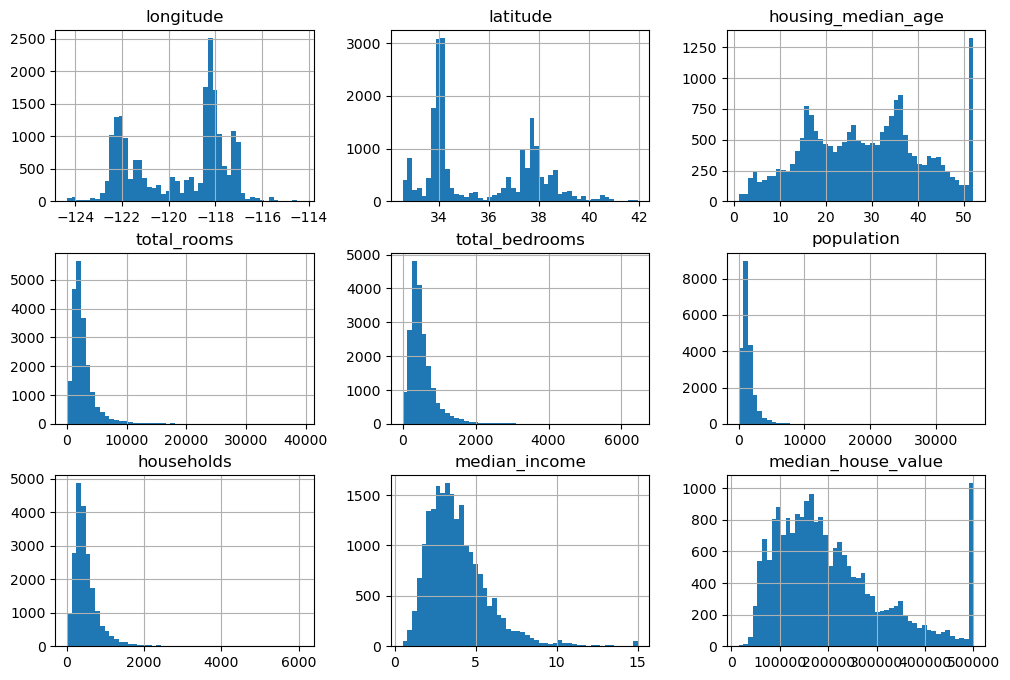

In [8]:
housing.hist(bins = 50,figsize = (12,8))

**First, `median_income` is scaled and capped at 15 (15.0001) for higher median incomes and at 0.5 (0.4999) for lower median incomes.** 

> Nếu cao quá thì median sẽ bị sai và scaled vì những giá trị tiền nó quá lớn so với những thằng còn lại, làm cho machine learning bị sai, nên sẽ scaled xuống, 3 -> $30.000.

**Second, `housing_median_age` and `median_house_value` are also capped.**

> Giới hạn từ bao nhiêu tới bao nhiêu.


## 1.4 Create a Test Set

Split như vậy sẽ dễ bị sampling bias - lấy mẫu thử nhiều số đông của 1 tập thể nào đó. Ví dụ muốn lấy survey Nam lẫn Nữ nhưng nếu split tập test chỉ có Nam nhiều hơn Nữ -> sampling bias

### 1.4.1 Random Split

In [9]:
trainSet, testSet = train_test_split(housing,test_size = 0.2, random_state=42)
#random_state means these set will remain stable even we reset many times or run this line code many times

In [10]:
housing["income_categories"] = pd.cut(housing["median_income"], bins = [0.,1.5,3.,4.5,6.,np.inf],labels = [1,2,3,4,5])

In [11]:
housing["income_categories"].value_counts()

income_categories
3    7236
2    6581
4    3639
5    2362
1     822
Name: count, dtype: int64

Text(0, 0.5, 'Number of districts')

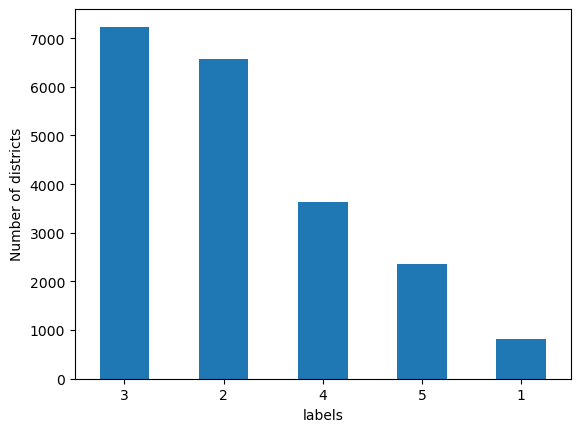

In [12]:
housing["income_categories"].value_counts().plot.bar(rot = 0)
plt.xlabel("labels")
plt.ylabel("Number of districts")

### 1.4.2 Stratified Shuffle Split

### Theory

Stratified Shuffle Split is a resampling technique used in machine learning to create training and testing sets while preserving the proportion of classes or groups in the original dataset. This method is particularly useful for datasets with imbalanced classes, ensuring that each subset of the data maintains the same distribution of the target variable as the entire dataset.

### Key Points

1. **Stratification**: This ensures that the proportion of each class in the target variable is consistent across both training and testing sets. For example, if a dataset has 70% of class A and 30% of class B, stratification will keep this ratio in both subsets.

2. **Shuffling**: The data is shuffled before splitting to ensure that the data points are randomly distributed, reducing the risk of bias that can occur if the data is ordered in a particular way.

3. **Splitting**: After shuffling, the data is split into training and testing sets. The split can be customized based on the desired ratio (e.g., 80% training and 20% testing).

### Advantages

- **Preservation of Class Distribution**: Maintains the class distribution in both the training and testing sets, which is crucial for accurate model evaluation, especially with imbalanced datasets.
- **Reduction of Bias**: Shuffling reduces potential biases that could be introduced by the order of data points.

### Implementation


In [13]:
from sklearn.model_selection import StratifiedShuffleSplit

splitter = StratifiedShuffleSplit(n_splits=10, test_size= 0.2, random_state=42) #n_splits = splits 10 times
splitSets = []
for trainIndex, testIndex in splitter.split(housing,housing["income_categories"]):
    splitSets.append([housing.iloc[trainIndex],housing.iloc[testIndex]])

In [14]:
trainSet, testSet = splitSets[0]

In [15]:
testSet["income_categories"].value_counts()/ len(testSet)

income_categories
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64

After using the train-test split, the distribution of income categories is as follows:

| Income Category | Proportion  |
|-----------------|-------------|
| 3               | 0.350533    |
| 2               | 0.318798    |
| 4               | 0.176357    |
| 5               | 0.114341    |
| 1               | 0.039971    |

This table represents the proportion of each income category in the dataset. The values are derived from the `income_categories` column and indicate the relative frequency of each category:

- **Category 3**: 35.05%
- **Category 2**: 31.88%
- **Category 4**: 17.64%
- **Category 5**: 11.43%
- **Category 1**: 3.99%

These proportions help in understanding the distribution of income categories in the dataset, which is crucial for ensuring that the training and testing sets are representative of the overall data.


After this step, we don't need the column income_categories anymore so we will drop it

In [16]:
if "income_categories" in trainSet.columns:
    trainSet.drop("income_categories", axis=1, inplace=True)
if "income_categories" in testSet.columns:
    testSet.drop("income_categories", axis=1, inplace=True)

/tmp/ipykernel_7829/3568939659.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trainSet.drop("income_categories", axis=1, inplace=True)
/tmp/ipykernel_7829/3568939659.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testSet.drop("income_categories", axis=1, inplace=True)


# 2. Explore and Visualize the Data to Gain Insights

In [17]:
trainSetCopy = trainSet.copy()

## 2.1 Visualize Geographical Data

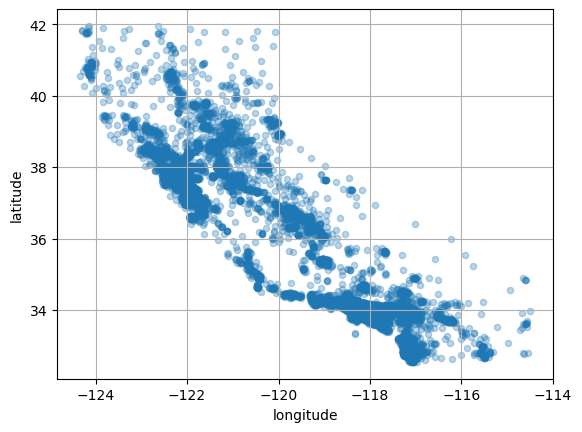

In [18]:
trainSetCopy.plot(kind = "scatter", x = "longitude",y = "latitude", grid=True,alpha = 0.3)
plt.show()

## `matplotlib.pyplot.scatter`

```python
matplotlib.pyplot.scatter(
    x, y, s=None, c=None, marker=None, cmap=None, norm=None, vmin=None, vmax=None, 
    alpha=None, linewidths=None, *, edgecolors=None, plotnonfinite=False, data=None, **kwargs
)


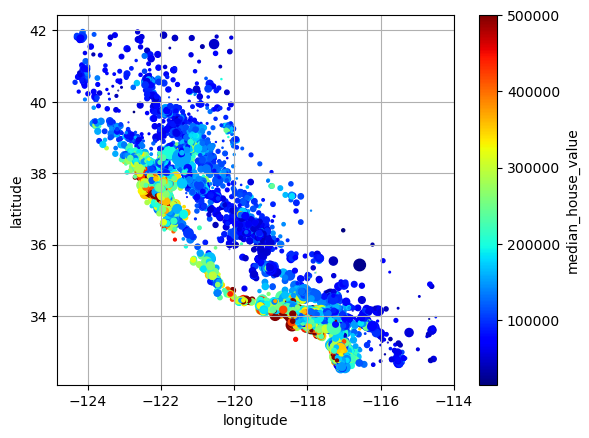

In [19]:
trainSetCopy.plot(kind = "scatter", x = "longitude",y = "latitude", grid=True,
                  s = trainSetCopy['population']/100, c="median_house_value"
                  ,cmap ="jet",colorbar=True, legend=True, sharex =False)
plt.show()

## 2.2 Look for Correlations

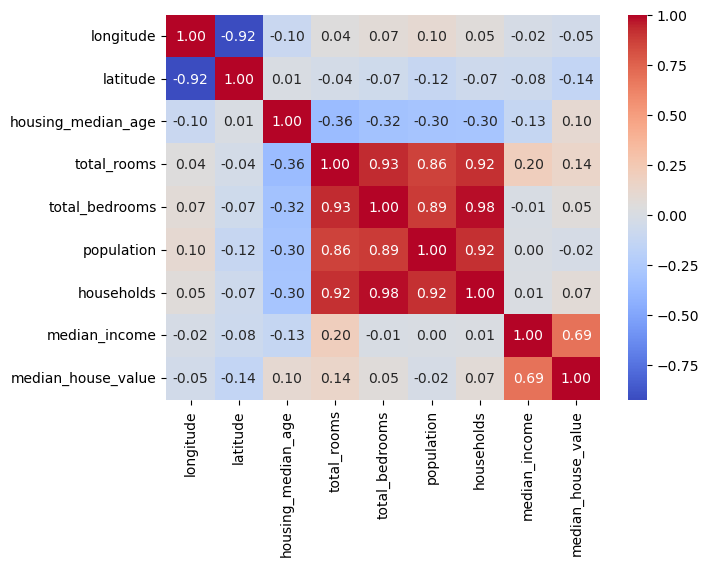

In [20]:
trainSetCopy.dtypes == 'float64'

matrixCorr = trainSetCopy[trainSetCopy.columns[trainSetCopy.dtypes == 'float64']].corr()

plt.figure(figsize=(7, 5))
sns.heatmap(matrixCorr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# Show the plot
plt.show()

## Correlation Analysis

- **Median House Value vs. Median Income**
  - There is a **strong positive correlation** between `median_house_value` and `median_income`. This means that as the `median_income` increases, the `median_house_value` tends to increase as well.

- **Median House Value vs. Longitude and Latitude**
  - There is a **strong negative correlation** between `median_house_value` and both `longitude` and `latitude`. This indicates that as we move to the north-east, the `median_house_value` tends to decrease.
  
- **Median House Value vs. Others**
  - There is no linear correlation betwee `median_house_value` and others.


Looking at the correlation scatterplots, it seems like the mosts promising attribute to predict the **median house value** is **median income**. We will looke more carefully about this relation.

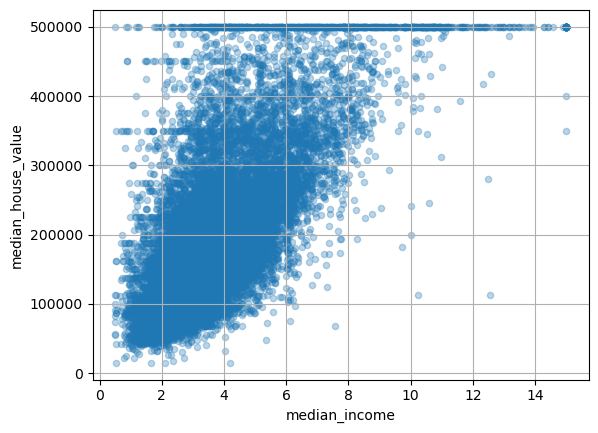

In [21]:
trainSetCopy.plot(kind = 'scatter', x = 'median_income', 
                  y = "median_house_value",alpha = 0.3,grid=True)
plt.show()

## Observations on Correlation

- **Strength of Correlation:**
  - Firstly, the correlation appears notably strong, evident from the discernible upward trend and the relatively clustered data points.

- **Price Limitation and Data Anomalies:**
  - Secondly, there's a notable price limitation observed at 500,000, represented as a distinct horizontal line. However, additional less apparent straight lines emerge at 450,000, 350,000, and 280,000. We intend to address these anomalies by considering the removal of corresponding districts to prevent the algorithms from incorporating these data peculiarities into their learning process.


## 2.3 Experiment with Attribute Combinations

One last thing we can do before preparing data is try out **combination** of useless attributes. For example, the total number of rooms in a district is not very useful if we don't know how many households there are. We can combine this into number of room per house.

In [22]:
trainSetCopy["rooms_per_house"] = trainSetCopy["total_rooms"] / trainSetCopy["households"]
trainSetCopy["bedrooms_ratio"] = trainSetCopy["total_bedrooms"] / trainSetCopy["total_rooms"]
trainSetCopy["people_per_house"] = trainSetCopy["population"] / trainSetCopy["households"]

In [23]:
trainSetCopy.dtypes == 'float64'

matrixCorr = trainSetCopy[trainSetCopy.columns[trainSetCopy.dtypes == 'float64']].corr()

matrixCorr["median_house_value"].sort_values(ascending = False)
# plt.figure(figsize=(7, 5))
# sns.heatmap(matrixCorr, annot=True, fmt='.2f', cmap='coolwarm', cbar=True)

# # Show the plot
# plt.show()

median_house_value    1.000000
median_income         0.688380
rooms_per_house       0.143663
total_rooms           0.137455
housing_median_age    0.102175
households            0.071426
total_bedrooms        0.054635
population           -0.020153
people_per_house     -0.038224
longitude            -0.050859
latitude             -0.139584
bedrooms_ratio       -0.256397
Name: median_house_value, dtype: float64

# 3. Prepare the Data for Machine Learning

It’s time to prepare the data for your Machine Learning algorithms. Instead of doing this manually, you should write functions for this purpose, for several good reasons:

1. **Reproducibility**: This will allow you to reproduce these transformations easily on any dataset (e.g., the next time you get a fresh dataset).  

2. **Reusable Transformation Library**: You will gradually build a library of transformation functions that you can reuse in future projects.  

3. **Integration with Live Systems**: You can use these functions in your live system to transform the new data before feeding it to your algorithms.  

4. **Ease of Experimentation**: This will make it possible for you to easily try various transformations and see which combination of transformations works best.  


In [24]:
trainSetCopy = trainSet.drop("median_house_value", axis = 1)
trainSetCopyLabels = trainSet["median_house_value"].copy()

## 3.1 Clean the Data

There are also more powerful imputers available in the `sklearn.impute` package:

- **KNNImputer**: This imputer uses k-nearest neighbors to impute missing values. You specify the number of neighbors (`n_neighbors`).
- **IterativeImputer**: This imputer models each feature with missing values as a function of other features and uses that estimate for imputation. You specify the maximum number of iterations (`max_iter`).


### Estimators

Any object that can estimate some parameters based on a dataset is called an estimator (e.g., a SimpleImputer is an estimator). The estimation itself is performed by the `fit()` method, and it takes a dataset as a parameter, or two for supervised learning algorithms—the second dataset contains the labels. Any other parameter needed to guide the estimation process is considered a hyperparameter (such as a SimpleImputer’s strategy), and it must be set as an instance variable (generally via a constructor parameter).

### Transformers

Some estimators (such as a SimpleImputer) can also transform a dataset; these are called transformers. Once again, the API is simple: the transformation is performed by the `transform()` method with the dataset to transform as a parameter. It returns the transformed dataset. This transformation generally relies on the learned parameters, as is the case for a SimpleImputer. All transformers also have a convenience method called `fit_transform()`, which is equivalent to calling `fit()` and then `transform()` (but sometimes `fit_transform()` is optimized and runs much faster).

### Predictors

Finally, some estimators, given a dataset, are capable of making predictions; they are called predictors. For example, the LinearRegression model in the previous chapter was a predictor: given a country’s GDP per capita, it predicted life satisfaction. A predictor has a `predict()` method that takes a dataset of new instances and returns a dataset of corresponding predictions. It also has a `score()` method that measures the quality of the predictions, given a test set (and the corresponding labels, in the case of supervised learning algorithms).

### Inspection

All the estimator’s hyperparameters are accessible directly via public instance variables (e.g., `imputer.strategy`), and all the estimator’s learned parameters are accessible via public instance variables with an underscore suffix (e.g., `imputer.statistics_`).

### Nonproliferation of Classes

Datasets are represented as NumPy arrays or SciPy sparse matrices, instead of homemade classes. Hyperparameters are just regular Python strings or numbers.

### Composition

Existing building blocks are reused as much as possible. For example, it is easy to create a Pipeline estimator from an arbitrary sequence of transformers followed by a final estimator, as you will see.

### Sensible Defaults

Scikit-Learn provides reasonable default values for most parameters, making it easy to quickly create a baseline working system.


In [25]:
trainSetNum = trainSetCopy[trainSetCopy.columns[trainSetCopy.dtypes == 'float64']]

In [26]:
imputer = SimpleImputer(strategy = "median")

imputer.fit(trainSetNum)
imputer.statistics_

array([-118.51  ,   34.26  ,   29.    , 2125.    ,  434.    , 1167.    ,
        408.    ,    3.5385])

In [27]:
X = imputer.transform(trainSetNum)
trainSet_tr  = pd.DataFrame(X,columns = trainSetNum.columns, index = trainSetCopy.index)
trainSet_tr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
13096,-122.42,37.80,52.0,3321.0,1115.0,1576.0,1034.0,2.0987
14973,-118.38,34.14,40.0,1965.0,354.0,666.0,357.0,6.0876
3785,-121.98,38.36,33.0,1083.0,217.0,562.0,203.0,2.4330
14689,-117.11,33.75,17.0,4174.0,851.0,1845.0,780.0,2.2618
20507,-118.15,33.77,36.0,4366.0,1211.0,1912.0,1172.0,3.5292
...,...,...,...,...,...,...,...,...
14207,-118.40,33.86,41.0,2237.0,597.0,938.0,523.0,4.7105
13105,-119.31,36.32,23.0,2945.0,592.0,1419.0,532.0,2.5733
19301,-117.06,32.59,13.0,3920.0,775.0,2814.0,760.0,4.0616
19121,-118.40,34.06,37.0,3781.0,873.0,1725.0,838.0,4.1455


## 3.2 Handling Text and Categorical Attributes

Most machine learning prefer to work with numbers, so lets convert these categories from text to numbers using **ENCODER**

In [28]:
trainSetCopy_cat = trainSetCopy[["ocean_proximity"]]
ordinalEncoder = OrdinalEncoder()
trainSetCopyEncoded = ordinalEncoder.fit_transform(trainSetCopy_cat)
trainSetCopyEncoded

array([[3.],
       [0.],
       [1.],
       ...,
       [4.],
       [0.],
       [4.]])

> ⚠️ **Warning:** One issue is that ML algorithms will assume that two nearby values are more similar than two distant values. This assumption is only appropriate for ordered categories (e.g., Excellent, Good, Average, Bad). Therefore, we need another method, called **One Hot Encoder**, to convert categorical attributes into a binary matrix.


In [29]:
oneHotEncoder = OneHotEncoder()
trainSetCopyEncoded = oneHotEncoder.fit_transform(trainSetCopy_cat)
trainSetCopyEncoded.toarray()

array([[0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.]])

> 💡 **Tip:** 

- **Consider Input Complexity:** If a categorical attribute encompasses numerous categories (like country codes, professions, or species), employing one-hot encoding may generate an excessive number of input features. This can potentially slow down training and diminish performance.
  
- **Explore Alternative Features:** In such scenarios, explore the possibility of replacing categorical inputs with relevant numerical features associated with the categories. For example:
  - Replace the `ocean_proximity` feature with distance to the ocean.
  - Substitute a country code with the country’s population and GDP per capita.
  
- **Utilize Encoder Packages:** Alternatively, leverage specialized encoders available in packages like `category_encoders` on GitHub, which offer tailored solutions for encoding categorical data.
  
- **For Neural Networks:** When working with neural networks, consider replacing each category with a learnable, low-dimensional vector known as an embedding. This approach, termed representation learning, can be particularly advantageous.
  
- **Further Exploration:** For deeper insights, delve into Chapters 13 and 17.


In [30]:
oneHotEncoder.feature_names_in_
oneHotEncoder.get_feature_names_out()

array(['ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'], dtype=object)

In [31]:
df_output = pd.DataFrame(trainSetCopyEncoded.toarray(), columns= oneHotEncoder.get_feature_names_out(), index = trainSetCopy.index)
df_output

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
13096,0.0,0.0,0.0,1.0,0.0
14973,1.0,0.0,0.0,0.0,0.0
3785,0.0,1.0,0.0,0.0,0.0
14689,0.0,1.0,0.0,0.0,0.0
20507,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...
14207,1.0,0.0,0.0,0.0,0.0
13105,0.0,1.0,0.0,0.0,0.0
19301,0.0,0.0,0.0,0.0,1.0
19121,1.0,0.0,0.0,0.0,0.0


## 3.3 Feature Scaling 

One of the most important transformations you need to apply to your data is feature scaling. With few exceptions, machine learning algorithms don’t perform well when the input numerical attributes have very different scales. 

This is the case for the housing data: the total number of rooms ranges from about 6 to 39,320, while the median incomes only range from 0 to 15. Without any scaling, most models will be biased toward ignoring the median income and focusing more on the number of rooms.

There are two common ways to get all attributes to have the same scale: min-max scaling and standardization.


- **Min-max scaling (Normalization):**
  - Min-max scaling is the simplest method: for each attribute, the values are shifted and rescaled so that they end up ranging from 0 to 1. This is performed by subtracting the min value and dividing by the difference between the min and the max. Scikit-Learn provides a transformer called MinMaxScaler for this purpose. It has a `feature_range` hyperparameter that lets you change the range if needed (e.g., neural networks often require inputs with zero mean and a range of -1 to 1).
  
- **Standardization:**
  - Standardization differs from min-max scaling: first, it subtracts the mean value (so standardized values have a zero mean), then it divides the result by the standard deviation (so standardized values have a standard deviation equal to 1). Unlike min-max scaling, standardization does not restrict values to a specific range. However, standardization is much less affected by outliers. 
  - *For instance, if a district has a median income of 100 (by mistake) instead of the usual 0–15, min-max scaling would map this outlier down to 1 and crush all other values down to 0–0.15, whereas standardization would not be significantly affected. Scikit-Learn provides a transformer called StandardScaler for standardization.*


In [32]:
minMaxScaler = MinMaxScaler(feature_range=(-1,1))
trainSetCopyMinMaxScaler = minMaxScaler.fit_transform(trainSetNum)


In [33]:
stdScaler = StandardScaler()
trainSetCopyStdScaler = stdScaler.fit_transform(trainSetNum)

In [34]:
trainSetCopyMinMaxScaler

array([[-0.60851927,  0.11702128,  1.        , ..., -0.80701754,
        -0.61433638, -0.7794789 ],
       [ 0.21095335, -0.66170213,  0.52941176, ..., -0.91866029,
        -0.86708979, -0.22929339],
       [-0.51926978,  0.23617021,  0.25490196, ..., -0.93141946,
        -0.92458466, -0.73336919],
       ...,
       [ 0.47870183, -0.99148936, -0.52941176, ..., -0.65513434,
        -0.71663244, -0.50873781],
       [ 0.20689655, -0.6787234 ,  0.41176471, ..., -0.78873758,
        -0.68751167, -0.49716556],
       [-0.60649087,  0.08723404,  0.68627451, ..., -0.91669734,
        -0.92122457, -0.61608805]])

In [35]:
trainSetCopyStdScaler

array([[-1.42303652,  1.0136059 ,  1.86111875, ...,  0.13746004,
         1.39481249, -0.93649149],
       [ 0.59639445, -0.702103  ,  0.90762971, ..., -0.69377062,
        -0.37348471,  1.17194198],
       [-1.2030985 ,  1.27611874,  0.35142777, ..., -0.78876841,
        -0.77572662, -0.75978881],
       ...,
       [ 1.25620853, -1.42870103, -1.23772062, ...,  1.26829911,
         0.67913534,  0.1010487 ],
       [ 0.58639727, -0.73960483,  0.66925745, ...,  0.27356264,
         0.88286825,  0.14539615],
       [-1.41803793,  0.94797769,  1.22545939, ..., -0.67915557,
        -0.75221898, -0.31034135]])

## 3.4 Transform

### 3.4.1 Transform input features

### Handling Features with Heavy Tails in Machine Learning

When a feature's distribution has a **heavy tail**, both min-max scaling and standardization will squash most values into a small range. Therefore, before scaling the feature, you should first transform it to:

1. **Shrink the heavy tail**
2. **Make the distribution roughly symmetrical**, ideally resembling a Gaussian (normal) distribution.

#### Example: Population Feature

The population feature often roughly follows a power law. For instance:
- Districts with 10,000 inhabitants are only 10 times less frequent than districts with 1,000 inhabitants, not exponentially less frequent.

**Transformation Approach**:
- **Log Transformation**: By computing the log of the population feature, it becomes very close to a Gaussian distribution (i.e., bell-shaped).

Figure 2-17 illustrates how much better this feature looks after applying the log transformation.


### Handling Heavy-Tailed Features with Bucketizing

Another approach to handle heavy-tailed features consists in **bucketizing** the feature. This means chopping its distribution into roughly equal-sized buckets and replacing each feature value with the index of the bucket it belongs to. 

#### Example: Income Category

We did something similar to create the `income_cat` feature (although we only used it for stratified sampling).

**Steps for Bucketizing**:
1. Replace each value with its percentile.
2. Bucketizing with equal-sized buckets results in a feature with an almost uniform distribution.
3. There’s no need for further scaling, or you can just divide by the number of buckets to force the values to the 0–1 range.


### Handling Multimodal Distributions

When a feature has a **multimodal distribution** (i.e., with two or more clear peaks, called modes), such as the `housing_median_age` feature, it can be helpful to bucketize it, treating the bucket IDs as categories rather than numerical values.

**Steps for Encoding Bucket IDs**:
- Encode the bucket indices using a `OneHotEncoder` (so you usually don’t want to use too many buckets).
- This approach allows the regression model to more easily learn different rules for different ranges of this feature value.

**Example**: 
- Houses built around 35 years ago might have a peculiar style that fell out of fashion, making them cheaper than their age alone would suggest.

#### Alternative Approach: Adding Features for Each Mode

Another approach to transforming multimodal distributions is to add a feature for each of the modes (at least the main ones), representing the similarity between the housing median age and that particular mode. 

**Similarity Measure**:
- Typically computed using a radial basis function (RBF)—any function that depends only on the distance between the input value and a fixed point.
- The most commonly used RBF is the **Gaussian RBF**, whose output value decays exponentially as the input value moves away from the fixed point.

**Gaussian RBF Example**:
- The similarity between the housing age \( x \) and 35 is given by the equation: 
  
  \[
  \text{exp}(-\gamma(x - 35)^2)
  \]
- The hyperparameter \( \gamma \) (gamma) determines how quickly the similarity measure decays as \( x \) moves away from 35.

Using Scikit-Learn’s `rbf_kernel()` function, you can create a new Gaussian RBF feature measuring the similarity between the housing median age and 35.


In [36]:
from sklearn.metrics.pairwise import rbf_kernel

age_simil_35 = rbf_kernel(housing[["housing_median_age"]], [[35]], gamma=0.1)

### 3.4.2 Transforming Target Values

So far we’ve only looked at the input features, but the target values may also need to be transformed. For example, if the target distribution has a **heavy tail**, you may choose to replace the target with its logarithm.

**Important Consideration**:
- If you transform the target to its logarithm, the regression model will predict the log of the median house value, not the median house value itself.
- You will need to compute the exponential of the model’s prediction to obtain the predicted median house value.


In [37]:
from sklearn.compose import TransformedTargetRegressor
from sklearn.linear_model import LinearRegression


some_new_data = trainSetCopy[["median_income"]].iloc[:5]  # pretend this is new data
some_new_data
model = TransformedTargetRegressor(LinearRegression(),
                                    transformer=StandardScaler())
model.fit(trainSetCopy[["median_income"]], trainSetCopyLabels)

predictions = model.predict(some_new_data)

### 3.4.3 Transformation Pipelines

There are many data transformation steps that need to be executed in the right order. Fortunately, Scikit-Learn provides the `Pipeline` class to help with such sequences of transformations. 

Here is a small pipeline for numerical attributes, which will first impute then scale the input features:

```python
from sklearn.pipeline import Pipeline

num_pipeline = Pipeline([
    ("impute", SimpleImputer(strategy="median")),
    ("standardize", StandardScaler()),
])

```

If you dont like to name the transformer, we can use make_pipeline:
    
```python  
from sklearn.pipeline import make_pipeline

num_pipeline = make_pipeline(SimpleImputer(strategy="median"), StandardScaler())
```

The pipeline exposes the same methods as the final estimator.  

In this example the last estimator is a StandardScaler, which is a transformer, so the pipeline also acts like a transformer. If you call the pipeline’s transform() method, it will sequentially apply all the transformations to the data. If the last estimator were a predictor instead of a transformer, then the pipeline would have a predict() method rather than a transform() method. Calling it would sequentially apply all the transformations to the data and pass the result to the predictor’s predict() method.

In [38]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector, make_column_transformer


#So inconvient  => make_column_selector
num_attribs = ["longitude", "latitude", "housing_median_age", "total_rooms",
               "total_bedrooms", "population", "households", "median_income"]
cat_attribs = ["ocean_proximity"]

num_pipeline = make_pipeline(SimpleImputer(strategy = "median"),StandardScaler())
cat_pipeline = make_pipeline(SimpleImputer(strategy= "most_frequent"),OneHotEncoder(handle_unknown='ignore'))


preprocessing = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_attribs),
        ("cat", cat_pipeline, cat_attribs)
    ],
    remainder='drop'  # specify how to handle remaining columns, you can also use 'passthrough' to keep them unchanged
)

In [39]:
trainSetCopyPrepared = preprocessing.fit_transform(trainSetCopy)

## Your Project Progress and Building a Transformation Pipeline

Your project is going really well and you’re almost ready to train some models! You now want to create a single pipeline that will perform all the transformations you’ve experimented with up to now. Let’s recap what the pipeline will do and why:

1. **Missing Values Imputation**: Missing values in numerical features will be imputed by replacing them with the median, as most ML algorithms don’t expect missing values. In categorical features, missing values will be replaced by the most frequent category.

2. **One-Hot Encoding**: The categorical feature will be one-hot encoded, as most ML algorithms only accept numerical inputs.

3. **Ratio Features Addition**: A few ratio features will be computed and added: `bedrooms_ratio`, `rooms_per_house`, and `people_per_house`. Hopefully, these will better correlate with the median house value and thereby help the ML models.

4. **Cluster Similarity Features Addition**: A few cluster similarity features will also be added. These will likely be more useful to the model than latitude and longitude.

5. **Logarithmic Transformation**: Features with a long tail will be replaced by their logarithm, as most models prefer features with roughly uniform or Gaussian distributions.

6. **Standardization**: All numerical features will be standardized, as most ML algorithms prefer when all features have roughly the same scale.


# 4. Select and Train Model

## Training a Basic Linear Regression Model

The good news is that thanks to all these previous steps, things are now going to be easy! You decide to train a very basic linear regression model to get started:


In [40]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(trainSetCopyPrepared, trainSetCopyLabels)
predictionUsingLinearReg = lin_reg.predict(trainSetCopyPrepared)
print(predictionUsingLinearReg[:5],trainSetCopyLabels[:5])


[269312. 333568. 120064. 110592. 306560.] 13096    458300.0
14973    483800.0
3785     101700.0
14689     96100.0
20507    361800.0
Name: median_house_value, dtype: float64


Well, it works, but not always: the first prediction is way off (by over $200,000!), while the other predictions are better: two are off by about 25%, and two are off by less than 10%. Remember that you chose to use the RMSE as your performance measure, so you want to measure this regression model’s RMSE on the whole training set using Scikit-Learn’s `mean_squared_error()` function, with the `squared` argument set to False:



In [41]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(trainSetCopyLabels, predictionUsingLinearReg, squared=False)
lin_rmse

/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


68243.16101271089

Kết quả lin_rmse bạn nhận được là khoảng 68232.835. Đây là giá trị RMSE (Root Mean Squared Error) của mô hình hồi quy tuyến tính trên dữ liệu huấn luyện. Giá trị này đại diện cho độ lớn của sai số trung bình giữa dự đoán của mô hình và nhãn thực tế trên toàn bộ tập dữ liệu huấn luyện.

Với RMSE này, bạn có thể đánh giá mức độ chính xác của mô hình. Một giá trị RMSE thấp hơn thường cho thấy rằng mô hình dự đoán gần với nhãn thực tế hơn. Trong trường hợp này, RMSE khoảng 68232.835 không thấp, cho thấy mô hình có thể cần được cải thiện để dự đoán chính xác hơn trên dữ liệu huấn luyện.

**Summary:**
The linear regression model's performance is unsatisfactory, with a typical prediction error of $68,628. This suggests underfitting, indicating that the features may not provide enough information or the model lacks complexity. To address underfitting, options include selecting a more powerful model, improving feature quality, or reducing model constraints. Since the current model isn't regularized, adding more features is the next step before considering a more complex model.

- **Issue**: The model's prediction error is high, indicating underfitting.
- **Reasons**: Possible reasons include inadequate feature information or insufficient model complexity.
- **Solutions**:
  - Select a more powerful model.
  - Enhance feature quality.
  - Reduce model constraints (not applicable here).
- **Next Steps**: Consider adding more features before exploring a more complex model.


## Training a Decision Tree Regressor Model

This is a fairly powerful model capable of finding complex nonlinear relationships in the data


In [42]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = make_pipeline(preprocessing, DecisionTreeRegressor(random_state=42))
tree_reg.fit(trainSetCopy, trainSetCopyLabels)
predictionUsingTree = tree_reg.predict(trainSetCopy)

In [43]:
from sklearn.metrics import mean_squared_error

lin_rmse = mean_squared_error(trainSetCopyLabels, predictionUsingTree, squared=False)
lin_rmse

/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


0.0

Wait, what!? No error at all? Could this model really be absolutely perfect? Of course, it is much more likely that the model has badly overfit the data. How can you be sure? As you saw earlier, you don’t want to touch the test set until you are ready to launch a model you are confident about, so you need to use part of the training set for training and part of it for model validation.


## Better Evaluation using Cross-Validation
https://cuonglv1109.blogspot.com/2018/11/cross-validation.html

In [44]:
from sklearn.model_selection import cross_val_score

tree_rmse = -cross_val_score(tree_reg, trainSetCopy, trainSetCopyLabels, scoring = "neg_root_mean_squared_error",cv = 10)

In [45]:
tree_rmse

array([69032.65226236, 67396.03872093, 67331.17750346, 70137.91696307,
       68274.93115806, 71446.43663424, 70628.43538691, 69457.94060134,
       67138.7823784 , 66941.10011402])

In [46]:
pd.Series(tree_rmse).describe()

count       10.000000
mean     68778.541172
std       1606.882060
min      66941.100114
25%      67347.392808
50%      68653.791710
75%      69967.922873
max      71446.436634
dtype: float64

If you compute the same metric for the linear regression model, you will find that the mean RMSE is 69,858 and the standard deviation is 4,182. So the decision tree model seems to perform very slightly better than the linear model, but the difference is minimal due to severe overfitting. We know there’s an overfitting problem because the training error is low (actually zero) while the validation error is high.


## Training a Random Forest Regressor Model

As you will see in Chapter 7, random forests work by training many decision trees on random subsets of the features, then averaging out their predictions. Such models composed of many other models are called ensembles: they are capable of boosting the performance of the underlying model (in this case, decision trees). The code is much the same as earlier:

In [56]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = make_pipeline(preprocessing,RandomForestRegressor(random_state=6)) 

forest_rmses = -cross_val_score(forest_reg, trainSetCopy, trainSetCopyLabels,
                                scoring="neg_root_mean_squared_error", cv=15)

In [48]:
pd.Series(forest_rmses).describe()

count       10.000000
mean     48920.517843
std        715.207292
min      47479.120613
25%      48492.372660
50%      49001.090516
75%      49386.763452
max      49998.347019
dtype: float64

# 5. Fine-tune your model
## 5.1 Grid Search
One option would be to fiddle with the hyperparameters manually, until you find a great combination of hyperparameter values. This would be very tedious work, and you may not have time to explore many combinations.

Instead, you can use Scikit-Learn’s `GridSearchCV` class to search for you. All you need to do is tell it which hyperparameters you want it to experiment with and what values to try out, and it will use cross-validation to evaluate all the possible combinations of hyperparameter values. For example, the following code searches for the best combination of hyperparameter values for the `RandomForestRegressor`:


In [49]:
from sklearn.preprocessing import FunctionTransformer
from sklearn.cluster import KMeans
from sklearn.base import BaseEstimator, TransformerMixin

class ClusterSimilarity(BaseEstimator, TransformerMixin):
    def __init__(self, n_clusters=10, gamma=1.0, random_state=None):
        self.n_clusters = n_clusters
        self.gamma = gamma
        self.random_state = random_state

    def fit(self, X, y=None, sample_weight=None):
        self.kmeans_ = KMeans(self.n_clusters, random_state=self.random_state)
        self.kmeans_.fit(X, sample_weight=sample_weight)
        return self  # always return self!

    def transform(self, X):
        return rbf_kernel(X, self.kmeans_.cluster_centers_, gamma=self.gamma)

    def get_feature_names_out(self, names=None):
        return [f"Cluster {i} similarity" for i in range(self.n_clusters)]

def column_ratio(X):
    return X[:, [0]] / X[:, [1]]

def ratio_name(function_transformer, feature_names_in):
    return ["ratio"]  # feature names out

def ratio_pipeline():
    return make_pipeline(
        SimpleImputer(strategy="median"),
        FunctionTransformer(column_ratio, feature_names_out=ratio_name),
        StandardScaler())

log_pipeline = make_pipeline(
    SimpleImputer(strategy="median"),
    FunctionTransformer(np.log, feature_names_out="one-to-one"),
    StandardScaler())
cluster_simil = ClusterSimilarity(n_clusters=10, gamma=1., random_state=42)
default_num_pipeline = make_pipeline(SimpleImputer(strategy="median"),
                                     StandardScaler())
preprocessing = ColumnTransformer([
        ("bedrooms", ratio_pipeline(), ["total_bedrooms", "total_rooms"]),
        ("rooms_per_house", ratio_pipeline(), ["total_rooms", "households"]),
        ("people_per_house", ratio_pipeline(), ["population", "households"]),
        ("log", log_pipeline, ["total_bedrooms", "total_rooms", "population",
                               "households", "median_income"]),
        ("geo", cluster_simil, ["latitude", "longitude"]),
        ("cat", cat_pipeline, make_column_selector(dtype_include=object)),
    ],
    remainder=default_num_pipeline)  # one column remaining: housing_median_age

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline


full_pipeline = Pipeline([
    ("preprocessing", preprocessing),
    ("random_forest", RandomForestRegressor(random_state=42)),
])
param_grid = [
    {'preprocessing__geo__n_clusters': [5, 8, 10],
     'random_forest__max_features': [4, 6, 8]},
    {'preprocessing__geo__n_clusters': [10, 15],
     'random_forest__max_features': [6, 8, 10]},
]
grid_search = GridSearchCV(full_pipeline, param_grid, cv=3,
                           scoring='neg_root_mean_squared_error')
grid_search.fit(trainSetCopy, trainSetCopyLabels)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                     SimpleImputer(strategy='median')),
                                                                                    ('standardscaler',
                                                                                     StandardScaler())]),
                                                          transformers=[('bedrooms',
                                                                         Pipeline(steps=[('simpleimputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('functiontransformer',
                                                                                          FunctionTransformer(feature_names_out=<f...
                                                                         <sklearn.compose._column_transformer.make_column_selector object at 0x76711ac8ff20>)])),
                                       ('random_forest',
                                        RandomForestRegressor(random_state=42))]),
             param_grid=[{'preprocessing__geo__n_clusters': [5, 8, 10],
                          'random_forest__max_features': [4, 6, 8]},
                         {'preprocessing__geo__n_clusters': [10, 15],
                          'random_forest__max_features': [6, 8, 10]}],
             scoring='neg_root_mean_squared_error')

In [55]:
cv_res = pd.DataFrame(grid_search.cv_results_)
cv_res.sort_values(by = "mean_test_score", ascending= False, inplace=True)
cv_res.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_preprocessing__geo__n_clusters,param_random_forest__max_features,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
12,3.798021,0.051731,0.093458,0.001669,15,6,"{'preprocessing__geo__n_clusters': 15, 'random...",-43520.694854,-43958.237963,-44759.841846,-44079.591555,513.105796,1
13,4.970004,0.102903,0.092689,0.000983,15,8,"{'preprocessing__geo__n_clusters': 15, 'random...",-44027.285408,-44179.627865,-45007.255144,-44404.722806,430.570141,2
14,6.093919,0.046988,0.091297,0.000926,15,10,"{'preprocessing__geo__n_clusters': 15, 'random...",-44402.775080,-44618.770051,-45423.947846,-44815.164326,439.413615,3
7,3.832959,0.046593,0.092667,0.000845,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44250.873441,-44825.226423,-45610.878897,-44895.659587,557.449151,4
9,3.690627,0.041554,0.088821,0.000359,10,6,"{'preprocessing__geo__n_clusters': 10, 'random...",-44250.873441,-44825.226423,-45610.878897,-44895.659587,557.449151,4


## 5.2 Randomized Search

This one is often preferable, especially when the hyperparameter search space is so large. Instead of trying out all possible combinations, it evaluates a fixed number of combinations, selecting a random value for each hyperparameter at every iteration. This approach has several benefits:

- Suppose we have a hyperparameter that can take any value between 0 and 100 (continuous range). In grid search, we might specify 5 values to explore: [0, 25, 50, 75, 100]. So, regardless of the number of iterations, grid search only considers these 5 values.
In contrast, with randomized search, if we specify 1000 iterations, it will randomly sample 1000 values from the continuous range of [0, 100]. This allows it to explore a much wider range of values compared to grid search, potentially leading to better hyperparameter optimization, especially for hyperparameters with continuous or large discrete spaces.

- Suppose a hyperparameter does not actually make much difference, if it has 10 possible values adding in to a Grid Search -> takes 10 times longer. But if you add it to a random search, it will not make any difference.

- If there are 6 hyperparameters with 10 possible values, the grid search will train million of times, whereas random search can always run for any number of iterations you choose.


In [59]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {'preprocessing__geo__n_clusters': randint(low=3, high=50),
                  'random_forest__max_features': randint(low=2, high=20)}

rnd_search = RandomizedSearchCV(
    full_pipeline, param_distributions=param_distribs, n_iter=10, cv=3,
    scoring='neg_root_mean_squared_error', random_state=42)

rnd_search.fit(trainSetCopy, trainSetCopyLabels)

RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder=Pipeline(steps=[('simpleimputer',
                                                                                           SimpleImputer(strategy='median')),
                                                                                          ('standardscaler',
                                                                                           StandardScaler())]),
                                                                transformers=[('bedrooms',
                                                                               Pipeline(steps=[('simpleimputer',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('functiontransformer',
                                                                                                FunctionTransformer(feature_names_...
                                             ('random_forest',
                                              RandomForestRegressor(random_state=42))]),
                   param_distributions={'preprocessing__geo__n_clusters': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x76710820e690>,
                                        'random_forest__max_features': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x7671098b1100>},
                   random_state=42, scoring='neg_root_mean_squared_error')

## 5.3 Ensemble Methods

Another way to fine-tune your system is to try to combine the models that perform best. The group (or “ensemble”) will often perform better than the best individual model—just like random forests perform better than the individual decision trees they rely on—especially if the individual models make very different types of errors. For example, you could train and fine-tune a k-nearest neighbors model, then create an ensemble model that just predicts the mean of the random forest prediction and that model’s prediction.


## 5.4 Analyzing the Best Models and Their Errors
You will often gain good insights on the problem by inspecting the best models. For example, the RandomForestRegressor can indicate the relative importance of each attribute for making accurate predictions:

In [61]:
final_model = rnd_search.best_estimator_
feature_importances = final_model["random_forest"].feature_importances_
feature_importances.round(2)

array([0.06, 0.06, 0.05, 0.01, 0.01, 0.01, 0.01, 0.19, 0.01, 0.02, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.02, 0.01, 0.  , 0.01, 0.01,
       0.01, 0.  , 0.01, 0.  , 0.02, 0.01, 0.01, 0.  , 0.01, 0.01, 0.01,
       0.02, 0.02, 0.01, 0.01, 0.01, 0.04, 0.01, 0.02, 0.01, 0.01, 0.01,
       0.02, 0.01, 0.  , 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.  , 0.08,
       0.  , 0.  , 0.  , 0.01])

In [62]:
sorted(zip(feature_importances, final_model["preprocessing"].get_feature_names_out()),reverse=True)

[(0.18836603202647126, 'log__median_income'),
 (0.07795960969938898, 'cat__ocean_proximity_INLAND'),
 (0.06110388595864347, 'bedrooms__ratio'),
 (0.05772194900488602, 'rooms_per_house__ratio'),
 (0.04569274355282605, 'people_per_house__ratio'),
 (0.041977095119231075, 'geo__Cluster 30 similarity'),
 (0.024893290428216704, 'geo__Cluster 9 similarity'),
 (0.02349145973584661, 'geo__Cluster 36 similarity'),
 (0.021384735075780065, 'geo__Cluster 18 similarity'),
 (0.019231937253583756, 'geo__Cluster 3 similarity'),
 (0.019114201150802552, 'geo__Cluster 32 similarity'),
 (0.01740110192655986, 'geo__Cluster 25 similarity'),
 (0.01628160145237179, 'geo__Cluster 1 similarity'),
 (0.015974756525084677, 'geo__Cluster 26 similarity'),
 (0.014014150061434243, 'geo__Cluster 7 similarity'),
 (0.013588284206905332, 'geo__Cluster 10 similarity'),
 (0.01344850861123562, 'geo__Cluster 12 similarity'),
 (0.013432151644106247, 'geo__Cluster 34 similarity'),
 (0.012971875049373518, 'geo__Cluster 19 similar

## 5.5 Evaluate Your System on the Test Set

After tweaking your models for a while, you eventually have a system that performs sufficiently well. You are ready to evaluate the final model on the test set. There is nothing special about this process; just get the predictors and the labels from your test set and run your final_model to transform the data and make predictions, then evaluate these predictions:

In [64]:
X_test = testSet.drop("median_house_value", axis=1)
y_test = testSet["median_house_value"].copy()

final_predictions = final_model.predict(X_test)

final_rmse = mean_squared_error(y_test, final_predictions, squared=False)
print(final_rmse)  # prints 41424.40026462184

41422.168800999665


/usr/lib/python3/dist-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# 6. Launch, Monitor, and Maintain your system
The most basic way to do this is just to save the best model you trained, transfer the file to your production environment, and load it. To save the model, you can use the joblib library like this:

In [65]:
import joblib

joblib.dump(final_model, "my_california_housing_model.pkl")

['my_california_housing_model.pkl']

In [68]:
# import joblib
# [...]  # import KMeans, BaseEstimator, TransformerMixin, rbf_kernel, etc.

# def column_ratio(X): [...]
# def ratio_name(function_transformer, feature_names_in): [...]
# class ClusterSimilarity(BaseEstimator, TransformerMixin): [...]

# final_model_reloaded = joblib.load("my_california_housing_model.pkl")

# new_data = [...]  # some new districts to make predictions for
# predictions = final_model_reloaded.predict(new_data)